`CMPE-255. Fall 2023`

Submitted By : Darshini Venkatesha Murthy Nag  
SJSU ID : 016668951  

# Breaking Enigma
The Enigma machine was used by the Germans in WWII to encrypt messages. It used a polyalphabetic substitution cipher to create encrypted text from plain text.
Our team of double-0 agents has retrieved one encrypted messages. Our job is to break the code! Or at least, examine the data and generate some statistics on it...



##Additional details
For this assignment, a simplified Enigma cipher is used. It uses a simple substitution scheme where each letter is replaced by a different letter at a specific, fixed, distance.

The space character (' ') is encoded as character '@'.

In [421]:
# Libraries - NO OTHER LIBRARY IS ALLOWED FOR THIS HOMEWORK
import random
import numpy as np
import sys
import matplotlib.pyplot as plt
# DO NOT ADD MORE LIBRARIES

In [422]:
# Plain text message
MESSAGE = "Sunny with early morning fog high 34C low 15C."
MESSAGE += "Admiral Crook arriving to Calais at 1400."
MESSAGE += "Prepare a light lunch and a bottle of Chateau Mouton Rothschild 1945."
MESSAGE += "God save the King."
# Alphabet
# Use '@' for ' '
ALPHABET = "@.0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"

In [423]:
def transpose_character(character, key):
    ''' Return a character that is at a distance 'key'
        from the supplied character'''
    transposed = ''
    # Replace space with '@'
    if character == ' ':
        character = '@'
    # Find character in the alphabet
    c_idx = ALPHABET.find(character)
    # Identify the character that is at distance 'key'
    c_key = key + c_idx
    if (c_key >= len(ALPHABET)):
        c_key = c_key - len(ALPHABET)

    return ALPHABET[c_key]

In [424]:
def encrypt_message(message, key):
    '''Given a plain text message and a key, generate an encrypted message'''
    ciphertext = ""
    for character in message.upper():
        ciphertext += transpose_character(character, key)
    return ciphertext

In [425]:
def decrypt_message(message, key):
    ''' Given an encrypted text message and a key, generate a plain text message'''
    tmp = ""
    for character in message.upper():
        tmp += transpose_character(character, key)

    # Handle 'space'
    plaintext = tmp.replace('@', ' ')
    return plaintext

In [426]:
def display_plaintext(message):
    print (message)

In [427]:
def display_ciphertext(ciphertext):
    ''' Display encrypted messages formated in groups and columns'''
    c_group = 4
    c_cols = 8
    c_idx = 0
    g_idx = 0
    for character in ciphertext:
        c_idx += 1
        sys.stdout.write(character)
        if c_idx == c_group:
            sys.stdout.write(" ")
            c_idx = 0
            g_idx += 1
        if g_idx == c_cols:
            sys.stdout.write("\n")
            g_idx = 0

    sys.stdout.write("\n")

In [428]:
plaintext = MESSAGE;
ciphertext = encrypt_message(plaintext, 12);
display_plaintext(plaintext)

Sunny with early morning fog high 34C low 15C.Admiral Crook arriving to Calais at 1400.Prepare a light lunch and a bottle of Chateau Mouton Rothschild 1945.God save the King.


In [429]:
display_ciphertext(ciphertext)

24ZZ 8A6U 3TAQ M1X8 AY@1 ZUZS AR@S ATUS 
TAFG OAX@ 6ADH OBMP YU1M XAO1 @@WA M11U 
5UZS A3@A OMXM U2AM 3ADG CCB. 1Q.M 1QAM 
AXUS T3AX 4ZOT AMZP AMAN @33X QA@R AOTM 
3QM4 AY@4 3@ZA 1@3T 2OTU XPAD LGHB S@PA 
2M5Q A3TQ AWUZ SB


In [430]:
decrypt_message(ciphertext, -12)

'SUNNY WITH EARLY MORNING FOG HIGH 34C LOW 15C.ADMIRAL CROOK ARRIVING TO CALAIS AT 1400.PREPARE A LIGHT LUNCH AND A BOTTLE OF CHATEAU MOUTON ROTHSCHILD 1945.GOD SAVE THE KING.'

# Deliverables

# 1. Generate statistical measurements on the encrypted message

## 1.1. Generate a list of character pairs
For the provided ciphertext, define a function `get_character_pairs(ciphertext)` that generates a list of character pairs. For instance, given the ciphertext:
```
24ZZ 8A6U 3TAQ M1X8 ...
```
The list of pairs will look like:
```
['24', '4Z', 'ZZ', 'Z8', '8A', ...]
```
This will be used in sections 1.3 and 1.4 below, and can be used in section 2 as well.

In [431]:
print(ciphertext)

# Generate a list of character pairs
def get_character_pairs(ciphertext):
  pairs = [ciphertext[i:i+2] for i in range(0, len(ciphertext)-1, 1)]
  return pairs

# Print character pairs
char_pairs = get_character_pairs(ciphertext)
print(char_pairs)

24ZZ8A6U3TAQM1X8AY@1ZUZSAR@SATUSTAFGOAX@6ADHOBMPYU1MXAO1@@WAM11U5UZSA3@AOMXMU2AM3ADGCCB.1Q.M1QAMAXUST3AX4ZOTAMZPAMAN@33XQA@RAOTM3QM4AY@43@ZA1@3T2OTUXPADLGHBS@PA2M5QA3TQAWUZSB
['24', '4Z', 'ZZ', 'Z8', '8A', 'A6', '6U', 'U3', '3T', 'TA', 'AQ', 'QM', 'M1', '1X', 'X8', '8A', 'AY', 'Y@', '@1', '1Z', 'ZU', 'UZ', 'ZS', 'SA', 'AR', 'R@', '@S', 'SA', 'AT', 'TU', 'US', 'ST', 'TA', 'AF', 'FG', 'GO', 'OA', 'AX', 'X@', '@6', '6A', 'AD', 'DH', 'HO', 'OB', 'BM', 'MP', 'PY', 'YU', 'U1', '1M', 'MX', 'XA', 'AO', 'O1', '1@', '@@', '@W', 'WA', 'AM', 'M1', '11', '1U', 'U5', '5U', 'UZ', 'ZS', 'SA', 'A3', '3@', '@A', 'AO', 'OM', 'MX', 'XM', 'MU', 'U2', '2A', 'AM', 'M3', '3A', 'AD', 'DG', 'GC', 'CC', 'CB', 'B.', '.1', '1Q', 'Q.', '.M', 'M1', '1Q', 'QA', 'AM', 'MA', 'AX', 'XU', 'US', 'ST', 'T3', '3A', 'AX', 'X4', '4Z', 'ZO', 'OT', 'TA', 'AM', 'MZ', 'ZP', 'PA', 'AM', 'MA', 'AN', 'N@', '@3', '33', '3X', 'XQ', 'QA', 'A@', '@R', 'RA', 'AO', 'OT', 'TM', 'M3', '3Q', 'QM', 'M4', '4A', 'AY', 'Y@', '@4', '43', '3@', '@

## 1.2. Based on what's known about the encryption algorithm, define a "distance" between two characters
Create a function `enigma_distance(pair)` that takes an input a pair of characters, and returns the distance between them.
Describe how the distance is calculated, and why it  makes sense to calculate it that way, based on what's known about the encryption algorithm.
This distance should be used for all other deliverables in this homework.

For this simplified Enigma cipher, we can calculate the distance between two characters as the absolute difference in their positions (Manhattan distance) in the ALPHABET. For example, the distance between 'A' and 'D' would be 3 because 'D' is three positions ahead of 'A' in the ALPHABET.

In [432]:
# Function that takes input a pair of characters
def enigma_distance(pair):
    char1, char2 = pair
    index1 = ALPHABET.index(char1)
    index2 = ALPHABET.index(char2)
    return abs(index1 - index2)

# print distance
char_distance = enigma_distance("4Z")
print(char_distance)

31


## 1.3. Calculate the average distance between two adjacent characters
Using the list of characters pairs generated in 1.1 above, create a function `average_distance(ciphertext)` that calculates the "average distance" between character pairs in a ciphertext.

In [433]:
def average_distance(ciphertext):
    pairs = get_character_pairs(ciphertext)
    total_distance = sum(enigma_distance(pair) for pair in pairs)
    return total_distance / len(pairs)

# Print Average distance
print(ciphertext)
avg_dist = average_distance(ciphertext)
print("Average Distance:", avg_dist)


24ZZ8A6U3TAQM1X8AY@1ZUZSAR@SATUSTAFGOAX@6ADHOBMPYU1MXAO1@@WAM11U5UZSA3@AOMXMU2AM3ADGCCB.1Q.M1QAMAXUST3AX4ZOTAMZPAMAN@33XQA@RAOTM3QM4AY@43@ZA1@3T2OTUXPADLGHBS@PA2M5QA3TQAWUZSB
Average Distance: 13.84393063583815


## 1.4. Calculate the min and max distance between two adjacent characters
Using the list of character pairs generated in 1.1 above, create a function `min_max_distance(ciphertext)` that calculates the min and max distances between characters in any of the pairs from the list.

In [434]:
def min_max_distance(ciphertext):
    pairs = get_character_pairs(ciphertext)
    distances = [enigma_distance(pair) for pair in pairs]
    min_distance = min(distances)
    max_distance = max(distances)
    return min_distance, max_distance

# Print min and max distance:
min_dist, max_dist = min_max_distance(ciphertext)
print("Min Distance:", min_dist)
print("Max Distance:", max_dist)


Min Distance: 0
Max Distance: 37


# 2. Compare two encrypted messages

## 2.1 Generate two different encrypted messages using different encryption keys

In [435]:
ciphertext1 = encrypt_message(plaintext, 12)
ciphertext2 = encrypt_message(plaintext, 8)

print("Ciphertext 1:", ciphertext1)
print("Ciphertext 2:", ciphertext2)

Ciphertext 1: 24ZZ8A6U3TAQM1X8AY@1ZUZSAR@SATUSTAFGOAX@6ADHOBMPYU1MXAO1@@WAM11U5UZSA3@AOMXMU2AM3ADGCCB.1Q.M1QAMAXUST3AX4ZOTAMZPAMAN@33XQA@RAOTM3QM4AY@43@ZA1@3T2OTUXPADLGHBS@PA2M5QA3TQAWUZSB
Ciphertext 2: @0VV462Q.P6MIZT46UWZVQVO6NWO6PQOP6BCK6TW269DK7ILUQZIT6KZWWS6IZZQ1QVO6.W6KITIQ@6I.69C887XZMXIZM6I6TQOP.6T0VKP6IVL6I6JW..TM6WN6KPI.MI06UW0.WV6ZW.P@KPQTL69HCD7OWL6@I1M6.PM6SQVO7


## 2.2. Compare both messages by calculating their similarity using the Cosine Similarity when applied to all the pairs of adjacent characters in the messages.

In [436]:
# Comparing the above ciphertexts using cosine similarity

# counting the character pairs generated
def count_character_pairs(message):
    pairs = get_character_pairs(message)
    pair_counts = {}

    for pair in pairs:
        if pair in pair_counts:
            pair_counts[pair] += 1
        else:
            pair_counts[pair] = 1

    return pair_counts

# cosine similarity function
def cosine_similarity(message1, message2):
    pair_counts1 = count_character_pairs(message1)
    pair_counts2 = count_character_pairs(message2)

    # Calculate the dot product of the two vectors
    dot_product = 0
    for pair in pair_counts1:
        if pair in pair_counts2:
            dot_product += pair_counts1[pair] * pair_counts2[pair]

    # Calculate the magnitudes of the vectors
    magnitude1 = sum(count ** 2 for count in pair_counts1.values())
    magnitude2 = sum(count ** 2 for count in pair_counts2.values())

    # Calculate the square root of the magnitudes using numpy
    magnitude1_sqrt = np.sqrt(magnitude1)
    magnitude2_sqrt = np.sqrt(magnitude2)

    # Calculate the cosine similarity
    similarity = dot_product / (magnitude1_sqrt * magnitude2_sqrt)
    return similarity

# Print the cosine similarity ciphertext1 and ciphertext2
similarity = cosine_similarity(ciphertext1, ciphertext2)
print("Cosine Similarity:", similarity)

Cosine Similarity: 0.04262295081967214


## 2.3. Repeat the calculation using the following two sets of inputs:

1. The plaintext message for both inputs. The cosine similarity should be "1" as it's comparing two identical inputs.
2. The following two inputs: `'96SCAF8T'` and `'AAAAAAAA'`. The cosine similarity should be "0" as it's comparing two completely orthogonal inputs.

In [437]:
# The plaintext message for both inputs

similarity_plaintext = cosine_similarity(plaintext, plaintext)
print("Cosine Similarity (Plaintext):", similarity_plaintext)

Cosine Similarity (Plaintext): 1.0000000000000002


In [438]:
# The following two inputs: '96SCAF8T' and 'AAAAAAAA'

similarity_orthogonal = cosine_similarity('96SCAF8T', 'AAAAAAAA')
print("Cosine Similarity (Orthogonal):", similarity_orthogonal)

Cosine Similarity (Orthogonal): 0.0


# 3. Visualize information related to the encrypted data.

## 3.1. Generate ten different encrypted messages of the same or similar length.

Updated the `generate_encrypted_messages()` function from above to support a variable number of arguments

In [439]:
# Function to generate encrypted messages
def generate_encrypted_messages(message, num_messages):
    encrypted_messages = []
    for _ in range(num_messages):
        key = random.randint(1, len(ALPHABET) - 1)  #Random key
        encrypted_message = encrypt_message(message, key)
        encrypted_messages.append(encrypted_message)
    return encrypted_messages

# Generate 10 different encrypted messages
num_messages = 10
encrypted_messages = generate_encrypted_messages(plaintext, num_messages)
for i, message in enumerate(encrypted_messages):
    print(f"Message {i + 1}: {message}")

Message 1: FHAALNJ5G4N1ZE8LN9BEA5A3N2B3N4534NST.N8BJNQU.OZ095EZ8N.EBB7NZEE5I5A3NGBN.Z8Z5FNZGNQTPPOCE1CZE1NZN8534GN8HA.4NZA0NZN@BGG81NB2N.4ZG1ZHN9BHGBANEBG4F.4580NQYTUO3B0NFZI1NG41N75A3O
Message 2: BD66HJF1C0JZVA4HJ57A616.J@7.J01.0JOPXJ47FJMQXKVY51AV4JXA773JVAA1E16.JC7JXV4V1BJVCJMPLLK8AZ8VAZJVJ41.0CJ4D6X0JV6YJVJW7CC4ZJ7@JX0VCZVDJ57DC76JA7C0BX014YJMUPQK.7YJBVEZJC0ZJ316.K
Message 3: NPIITVRDOCV95MGTVHJMIDIBVAJBVCDBCV@.7VGJRVY07W58HDM5GV7MJJFV5MMDQDIBVOJV75G5DNV5OVY.XXWKM9K5M9V5VGDBCOVGPI7CV5I8V5V6JOOG9VJAV7C5O95PVHJPOJIVMJOCN7CDG8VY4.0WBJ8VN5Q9VOC9VFDIBW
Message 4: EG99KMI4F3M0YD7KM8AD9492M1A2M3423MRS@M7AIMPT@NY.84DY7M@DAA6MYDD4H492MFAM@Y7Y4EMYFMPSOONBD0BYD0MYM7423FM7G9@3MY9.MYMZAFF70MA1M@3YF0YGM8AGFA9MDAF3E@347.MPXSTN2A.MEYH0MF30M6492N
Message 5: HJCCNPL7I6P3.GANPBDGC7C5P4D5P6756PUV1PADLPSW1Q.2B7G.AP1GDD9P.GG7K7C5PIDP1.A.7HP.IPSVRRQEG3E.G3P.PA756IPAJC16P.C2P.P0DIIA3PD4P16.I3.JPBDJIDCPGDI6H167A2PS@VWQ5D2PH.K3PI63P97C5Q
Message 6: XZSS13.NYM3JFWQ13RTWSNSL3KTL3MNLM389H3QT.36AH4FIRNWFQ3HWTTP

## 3.2. Using one of the encrypted messages, generate a histogram of the occurrence of each character in the alphabet

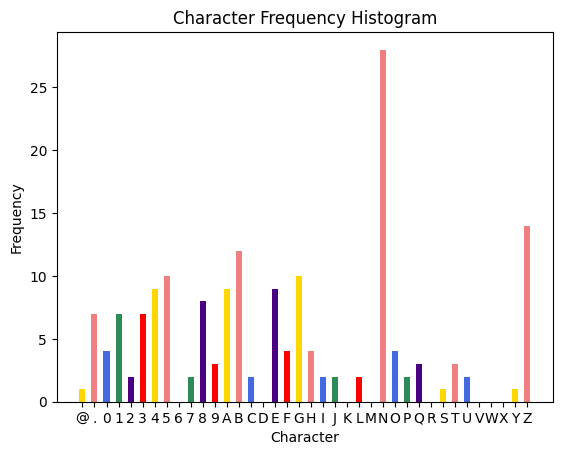

In [440]:
#Function to generate histogram
def generate_histogram(ciphertext):
    character_count = {char: 0 for char in ALPHABET}
    for char in ciphertext:
        character_count[char] += 1

    # Plot the histogram
    bar_colors = ['gold', 'lightcoral', 'royalblue', 'seagreen', 'indigo', 'red']
    bar_width = 0.5
    plt.bar(character_count.keys(), character_count.values(), color=bar_colors, width=bar_width)
    plt.xlabel('Character')
    plt.ylabel('Frequency')
    plt.title('Character Frequency Histogram')
    plt.show()

#Can use any 1 of the 10 encrypted messages here i am using 1st encrypted message
encrypted_message_occurence = encrypted_messages[0]
generate_histogram(encrypted_message_occurence)

## 3.3. Using all ten encrypted messages as data sample, generate a box plot of the frequency of the five vowels of the alphabet

The frequency of 'A' across 10 messages is: [9, 9, 2, 12, 8, 2, 9, 2, 2, 0]
The frequency of 'E' across 10 messages is: [9, 2, 0, 4, 2, 1, 8, 12, 3, 3]
The frequency of 'I' across 10 messages is: [2, 0, 9, 2, 10, 4, 2, 4, 0, 2]
The frequency of 'O' across 10 messages is: [4, 1, 10, 2, 0, 0, 2, 2, 7, 1]
The frequency of 'U' across 10 messages is: [2, 1, 0, 0, 1, 2, 4, 0, 2, 9]


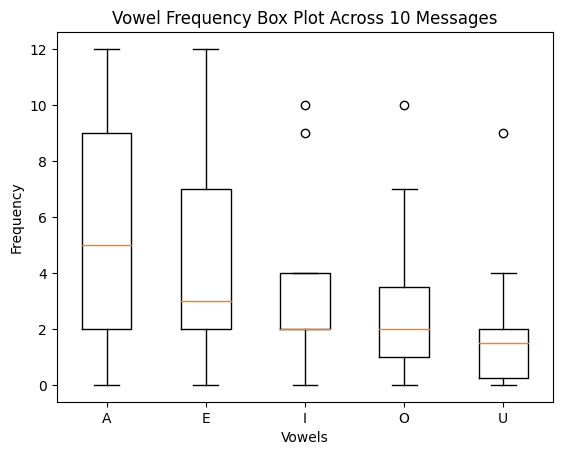

In [441]:
def generate_vowel_box_plot(encrypted_messages):
    vowel_freq = {vowel: [] for vowel in "AEIOU"}

    for ciphertext in encrypted_messages:
        vowel_count = {vowel: 0 for vowel in "AEIOU"}
        for char in ciphertext:
            if char in "AEIOU":
                vowel_count[char] += 1

        for vowel in "AEIOU":
            vowel_freq[vowel].append(vowel_count[vowel])

    print("The frequency of 'A' across 10 messages is:", vowel_freq['A'])
    print("The frequency of 'E' across 10 messages is:", vowel_freq['E'])
    print("The frequency of 'I' across 10 messages is:", vowel_freq['I'])
    print("The frequency of 'O' across 10 messages is:", vowel_freq['O'])
    print("The frequency of 'U' across 10 messages is:", vowel_freq['U'])

    # Plot the box plot
    plt.boxplot([vowel_freq['A'], vowel_freq['E'], vowel_freq['I'], vowel_freq['O'], vowel_freq['U']], labels=['A', 'E', 'I', 'O', 'U'])
    plt.xlabel('Vowels')
    plt.ylabel('Frequency')
    plt.title('Vowel Frequency Box Plot Across 10 Messages')
    plt.show()

# Example usage using all 10 encrypted messages
generate_vowel_box_plot(encrypted_messages)


## 4. Would any other measurement of distance or similarity be useful for extracting information from the encrypted message? Why?

In the context of the Enigma encryption problem, Manhattan distance and Cosine similarity are reasonable measures for character distance and similarity. However, other measurements of distance or similarity that can be useful for extracting information from the encrypted message include:

**Jaccard Similarity:** This can be used to measure the similarity between sets of characters. For example, we could create sets of characters for each encrypted message and calculate the Jaccard similarity to see which messages share common characters.

**Levenshtein Distance:** This can be used to measure the edit distance between two strings, which could be useful for assessing how different two encrypted messages are.

**Hamming Distance:**  This can be used to measure the number of positions at which two strings of equal length differ. It could be useful for comparing ciphertexts to identify potential errors in decryption or to determine the similarity between two messages with the same length.

The choice of measurement depends on the specific analysis and goals for extracting information from the encrypted message. Each measurement has its strengths and weaknesses, and the most appropriate one would depend on the nature of the data and the desired insights.





